# The problem statement is of cars dataset having 156 observation and 16 different variables. Linear regression model has been applied to predict the sales of car

## 1. Importing the data set

In [8]:
import pandas as pd
import seaborn as sns
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head(5)

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
Manufacturer          156 non-null object
Model                 156 non-null object
Sales_in_thousands    151 non-null float64
_year_resale_value    156 non-null float64
Vehicle_type          156 non-null object
Price_in_thousands    156 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null int64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           156 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       156 non-null int64
Latest_Launch         156 non-null object
Power_perf_factor     156 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 19.6+ KB


## 2. Shape and descriptive statistics for data

In [107]:
car.shape

(156, 16)

In [105]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,57.858817,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,74.966671,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.035000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,29.213000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,71.690250,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


Variation is high for Sales.
Range of 75th percentile to Max is high for Sales. There is probablity of have outlier in Sales

## 3. Replacing missing value with median for Sales

In [9]:
def lr():
    car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
    return
lr()
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


## 4. Dummy variable creation for Vehicle Type

In [108]:
car_dummy =pd.DataFrame()                                           
def lr(car):
    dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
    return dummies
car_dummy = lr(car)
car_dummy.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,1
1,Acura,TL,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,1
2,Acura,CL,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,1
3,Acura,RL,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,1


## 5. Data restructure by dropping non impacting columns while predicting Sales

In [109]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch','Length','Curb_weight']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
print(car_dummy)

     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000              21.500          1.8   
1                39.384           19.875000              28.400          3.2   
2                14.114           18.225000              29.000          3.2   
3                 8.588           29.725000              42.000          3.5   
4                20.397           22.255000              23.990          1.8   
5                18.780           23.555000              33.950          2.8   
6                 1.380           39.000000              62.000          4.2   
7                19.747           18.072975              26.990          2.5   
8                 9.231           28.675000              33.400          2.8   
9                17.527           36.125000              38.900          2.8   
10               91.561           12.475000              21.975          3.1   
11               39.350           13.740

## 6. Correlation among variables

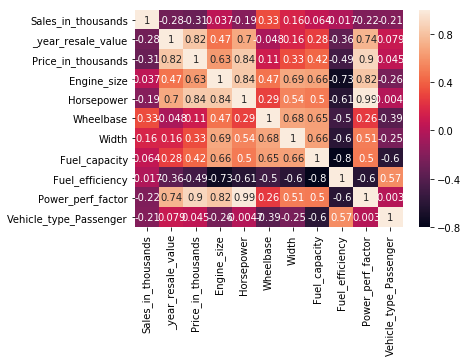

In [60]:
def lr():
    import seaborn as sns
    sns.heatmap(car_dummy.corr(),annot= True)
    return None 
lr()

Price_in_thousands and year_resale_value are highly correlated = 0.82
Price_in_thousands and Horsepower are highlighy correlated = 0.84
Horsepower and Power_perf_factor are extremely correlated = 0.99
Engine_size and Horsepower are highly correlated = 0.84
Fuel_Efficiency is negatively correlated with Fuel_Capacity = -0.8

Sustaining Horsepower column and dropping others as the impact of horsepower on Sales would clearly demonstrate the impact of other fields

Sales does not have any correlation impact with any independent factor. Therefore, other factors would be important to analyze the regression model for Sales

## 7. Dropping column with high correlation

In [61]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['Price_in_thousands', 'Engine_size', '_year_resale_value','Power_perf_factor']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)

## 8. Pairplot mapping for variable with low correlation

C:\Users\amarwah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


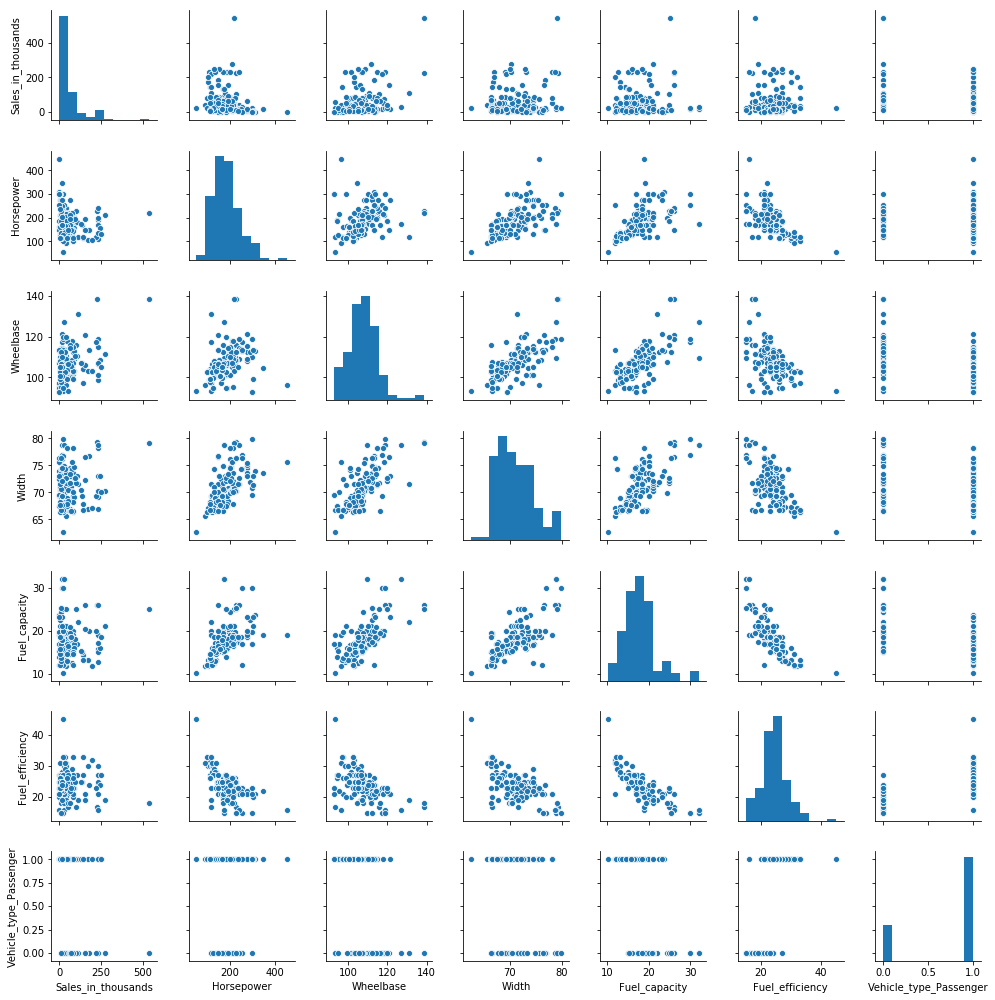

In [64]:
def lr():
    import seaborn as sns
    sns.pairplot(car_dummy,size = 2, aspect = 1)
    return None 
lr()

More than 95% of the data lies within 100 to 200 horsepower range. Vehicles with low horsepower are sold higher than high horsepower
Outliers for Fuel efficiency where Sales is showing low for high fuel efficiency and high for low fuel efficiency 

## 9. Scaling the variable for ease of data compution

In [82]:
std = pd.DataFrame()
car_modify = car_dummy
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std[1])

[-0.2472341   0.69094938  0.08045672 -0.24703626 -0.19402264  0.27500229
  0.58722022]


C:\Users\amarwah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amarwah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## 10. Preparation of independent variable for model

In [79]:
columns = ['Sales_in_thousands','Horsepower','Wheelbase','Width','Fuel_capacity','Fuel_efficiency','Vehicle_type_Passenger']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
X = pd.DataFrame()
feature_cols = ['Horsepower','Wheelbase','Width','Fuel_capacity','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

     Horsepower  Wheelbase     Width  Fuel_capacity  Fuel_efficiency  \
0     -0.812988  -0.825439 -1.118929      -1.226164         0.982151   
1      0.690949   0.080457 -0.247036      -0.194023         0.275002   
2      0.690949  -0.077090 -0.159847      -0.194023         0.510719   
3      0.425549   0.933837  0.072658       0.012406        -0.432146   
4     -0.636055  -0.641634 -0.857361      -0.400451         0.746435   
5      0.248615   0.159230  1.438623       0.141423        -0.432146   
6      2.194887   0.723774  0.828298       1.483206        -0.667863   
7     -0.282187  -0.024575 -0.799235      -0.348844         0.510719   
8      0.124761  -0.024575 -0.770172      -0.348844         0.039286   
9      0.124761   0.513711 -0.072658       0.141423         0.275002   
10    -0.193720   0.198617  0.450478      -0.116612         0.275002   
11     0.956350   0.198617  0.450478      -0.116612        -0.196430   
12     0.337082   0.828805  1.031740       0.141423         0.03

In [83]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(156, 6)


## 11. Preparation of dependent variable for model

In [88]:
y = pd.DataFrame()
y = car_dummy['Sales_in_thousands']
y.head()

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64

## 12. Split X and Y variable into train and test data

In [93]:
from sklearn.model_selection import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test = lr()

In [94]:
print(X_train.shape)
print(y_train.shape)

(124, 6)
(124,)


In [101]:
print(X_test.shape)
print(y_test.shape)

(32, 6)
(32,)


## 13. Linear Regression model 1 build

In [95]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### 13.1 Linear model fit

In [103]:
def lr():
    linreg.fit(X_train, y_train)  
lr()

### 13.2 Model intercept and coefficient interpretation

In [97]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 58.047290723196475
Coefficients: [-21.36183155  32.49282655  11.36695318 -19.80836917  -2.13282781
 -10.25966629]


### 13.3 Feature name pairing with coefficient

In [98]:
def lr():
    feature_cols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 58.047290723196475
Horsepower -21.361831548694237
Wheelbase 32.49282655469219
Width 11.366953181519188
Fuel_capacity -19.808369165932568
Fuel_efficiency -2.1328278052500864
Vehicle_type_Passenger -10.259666294087095


### 13.4 Train value prediction using model

In [100]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['Sales']
    head = pred.head()
    return head
lr()

,Sales
0,23.727196
1,66.218289
2,41.364619
3,47.541929
4,24.939834


### 13.5 Test value prediction using model

In [99]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['Sales']
    head = pred_test.head()
    return head
lr()

,Sales
0,55.571487
1,23.365372
2,67.685501
3,82.490128
4,48.172190


### 13.6 Mean Absolute Error Model Evaluation

In [110]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 45.68899825988919
MAE for test set is 43.85008982682457


### 13.7 Mean Square Error Model Evaluation

In [111]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 4449.472996179814
MSE for test set is 3903.8874783032034


### 13.8 Root Mean Square Error Model Evaluation

In [113]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 66.70437014304096
RMSE for test set is 62.48109696782863


## 14. Linear Regression model 2 build

In [125]:
from sklearn.model_selection import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = lr()

In [126]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### 14.1 Linear model fit

In [127]:
def lr():
    linreg.fit(X_train, y_train)  
lr()

### 14.2 Cofficient and Intercept Interpretation

In [128]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 59.52226672604195
Coefficients: [-24.31321644  34.40793168  12.03334834 -23.42187595  -6.18733941
  -9.40610521]


### 14.3 Train model prediction

In [129]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['Sales']
    head = pred.head()
    return head
lr()

,Sales
0,67.589336
1,34.781201
2,49.154747
3,51.594839
4,89.911369


### 14.4 Test model prediction

In [130]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['Sales']
    head = pred_test.head()
    return head
lr()

,Sales
0,57.766659
1,21.388687
2,69.078285
3,86.176991
4,51.751474


### 14.5 Root Mean Square Error Model Evaluation

In [131]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 68.84038475381199
RMSE for test set is 58.926074722927865


## Model Evaluation Analysis:

Model 1 equation:
Y = 58.04 – (21.36 * Horsepower) + (32.49 * Wheelbase) + (11.36 * Width) – (19.08 * Fuel Capacity) – (2.13* Fuel Efficiency) – (10.25 * Vehicle Type)

Model 2 equation:
Y = 59.52 – (24.31 * Horsepower) + (34.40 * Wheelbase) + (12.03 * Width) – (23.42 * Fuel Capacity) – (6.18* Fuel Efficiency) – (9.4 * Vehicle Type)

### From the analysis based on model 1 and model 2, for train data the RMSE is less for model 1 and for test data the RMSE is less for model 2
#### Model 1 accounts 80% of train data and 20% of test data
#### Model 2 accounts 70% of train data and 30% of test data